In [1]:
from Neural_Nets.ThermoNet.Development.ThermoNet import ThermoRegressionNet
from Neural_Nets.ThermoDataset.Development.ThermoDataset import ThermoDataset
from Neural_Nets.ThermoNetActFuncs.Development.ThermoNetActFuncs import Sigmoid, Softplus, ChenSundman, ELUFlipped, Log
from Utils.PlotHandler.Development.PlotHandler import PlotHandler 
import torch
from torch.utils.data import DataLoader, Dataset
import torch.nn as nn
from torch.optim import Rprop, Adam
from Data_Handling.SGTEHandler.Development.SGTEHandler import SGTEHandler
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def epoch(net: ThermoRegressionNet, dataloader, loss_func, optimizer):
    epoch_losses = np.zeros([len(dataloader), ])

    for i, (temp, g, _, _, _) in enumerate(dataloader):
        temp = temp.unsqueeze(-1)
        
        # Forward pass
        gibbs_energy = net(temp)
        
        # Get the loss
        loss = loss_func(gibbs_energy, g.float())

        # Backward pass
        net.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_losses[i] = loss

    print(gibbs_energy.min(), g.min())
    mean_epoch_loss = epoch_losses.mean()
    #print('Mean epoch loss: ', mean_epoch_loss)
    return mean_epoch_loss

In [3]:
def train(net, dataset):
    # Hyperparameters
    n_epochs = 100
    lr = 0.1
    batch_size = 16
    std_thresh = 0.05

    # Data
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

    # Optimizer
    optimizer = Adam(net.parameters(), lr=lr)
    loss_func = nn.MSELoss()

    losses = []
    
    # Keep track of epoch where learning rate was reduced last
    lr_reduced_last = 0

    for i in range(n_epochs):
        #print('-----\nEpoch %i:\n' % i)
        loss = epoch(net, dataloader, loss_func, optimizer)
        losses.append(loss)
        
        # Adapt learning rate if standard deviation over the last 10 epochs is below a threshold
        if np.array(losses[-10:]).std() < std_thresh and (i - lr_reduced_last) >= 10:
            print('Learning rate halfed! \n')
            lr_reduced_last = i
            lr /= 2

In [4]:
net = ThermoRegressionNet(hidden_layers=1, hidden_dim=16, act_func=ELUFlipped())

element = 'Fe'
phase = ['BCC_A2']
dataset = ThermoDataset(element, phase, step=100, scaling=True)

train(net, dataset)

Fe successfully selected!



C:\Users\danie\anaconda3\envs\5_Programmcodes\lib\site-packages\torch\nn\modules\loss.py:520: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
C:\Users\danie\anaconda3\envs\5_Programmcodes\lib\site-packages\torch\nn\modules\loss.py:520: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


tensor(-1.9289, grad_fn=<MinBackward1>) tensor(-1., dtype=torch.float64)
tensor(0.7090, grad_fn=<MinBackward1>) tensor(-1., dtype=torch.float64)
tensor(-0.6568, grad_fn=<MinBackward1>) tensor(-1., dtype=torch.float64)
tensor(-1.3950, grad_fn=<MinBackward1>) tensor(-1., dtype=torch.float64)
tensor(-0.8207, grad_fn=<MinBackward1>) tensor(-1., dtype=torch.float64)
tensor(-0.0733, grad_fn=<MinBackward1>) tensor(-1., dtype=torch.float64)
tensor(-0.6188, grad_fn=<MinBackward1>) tensor(-1., dtype=torch.float64)
tensor(-1.0823, grad_fn=<MinBackward1>) tensor(-1., dtype=torch.float64)
tensor(-0.9819, grad_fn=<MinBackward1>) tensor(-1., dtype=torch.float64)
tensor(-0.5717, grad_fn=<MinBackward1>) tensor(-1., dtype=torch.float64)
tensor(-0.4123, grad_fn=<MinBackward1>) tensor(-1., dtype=torch.float64)
tensor(-0.6716, grad_fn=<MinBackward1>) tensor(-1., dtype=torch.float64)
tensor(-0.9012, grad_fn=<MinBackward1>) tensor(-1., dtype=torch.float64)
tensor(-0.9065, grad_fn=<MinBackward1>) tensor(-1., 

Fe successfully selected!

tensor(1999., dtype=torch.float64)
tensor([[ 322.3390],
        [ 323.4339],
        [ 324.5288],
        ...,
        [2181.4517],
        [2182.5469],
        [2183.6416]])
tensor(125947.5078, dtype=torch.float64)


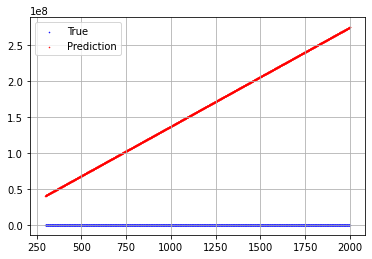

In [5]:
ph = PlotHandler()

ph.properties_temp(net, element, phase, scaling=True)